<a href="https://colab.research.google.com/github/luanavsr/cfg_estudos/blob/main/Metodos_Quantitativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos Quantitativos
### O objetivo com esse arquivo é aplicar os conhecimentos que aprendo no estudo para o CFG (Anbima) na linguagem python. 

- Estatística
  - Medidas de posição central
  - Medidas de Retorno
  - Medidas de dispersão
  - Medidas de Associação entre duas variáveis
  - Risco de uma carteira com 2 ou 3 ativos

- Distribuição de probabilidade
  - Conceitos de probabilidade
  - Simulação de Monte Carlo
  - Amostragem
  - Estimação

- Teste de Hipótese
  - Hipótese nula e alternativa
  - Teste de Hipótese, Significância e Regras de Decisão
  - Erros Tipo I e Tipo II
  - Teste Uni-caudal ou Bicaudal
  - Probabilidade  da Significância (Valor p)
  - Análise de Variância (ANOVA) e a Estatística F
  -  Teste de Hipótese para a média populacional
  - Teste de Hipótese para a variância única

- Regressão Linear
  - Regressão Linear simples
  - Regressão Linear Múltipla

- Indicadores de Análise Técnica
  - Rastreadores de Tendência
  - Indicadores de Reversão
  - Indicadores de Volume


In [ ]:
# importando os pacotes para a próxima seção

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web

!pip install yfinance --upgrade --nocache-dir
import yfinance as yf
yf.pdr_override()


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --nocache-dir


[*********************100%***********************]  3 of 3 completed


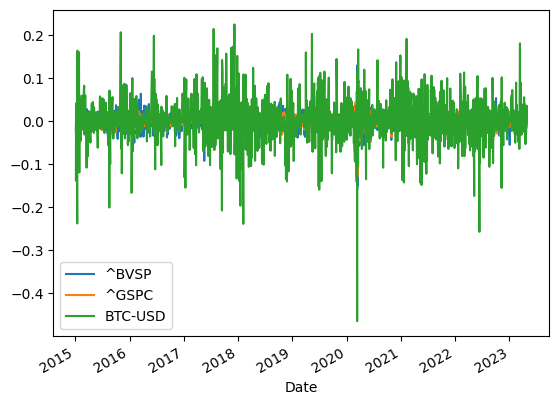

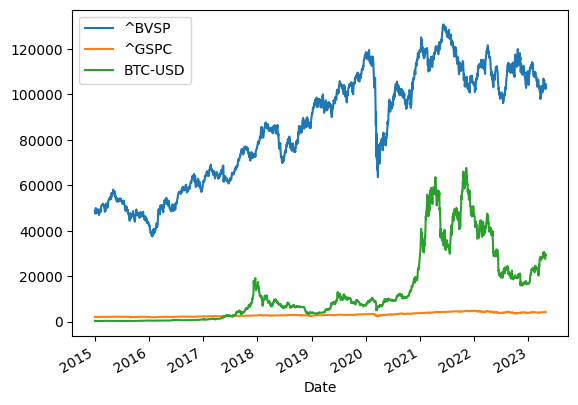

<Axes: xlabel='Date'>

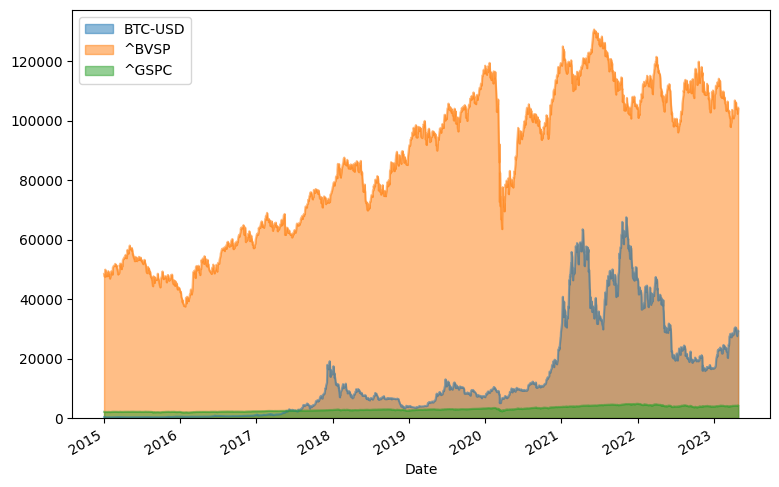

In [ ]:
# dados que serão usados durante todo o estudo
start_date = '2015-01-01'
end_date =  '2023-05-01' 
stocks = ['^BVSP', '^GSPC', 'BTC-USD']

# baixando os dados, filtrando para pegar o preço de fechamento ajustado e retirandos os dias sem observações. Dados baixados: Série de pontos do Ibovespa, S&P500 e preço do BTC usd.
df_prices = yf.download(stocks, start = start_date, end = end_date)['Adj Close'].dropna()

# transformandos os preços em retornos, mas antes é importante saber a diferença entre log retornos e retornos simples. 

"""
Log returns x Simple returns

Retornos em log (log returns) são calculados da seguinte maneira log(Rt/Rt-1), onde Rt é o valor atual e Rt-1 é o valor anterior. Os retornos em log tem a propriedade de transformar os 
retornos aritiméticos (retornos simples) em adições. Em outras palavras, quando os retornos em log são somados ao longo de um período eles fornecem o retorno total do período. 

Os retornos simples ou aritméticos,  são calculados como a diferença percentual entre o valor atual e o valor anterior de um ativo [(Rt - Rt-1) / Rt-1]. Os retornos simples são mais
intuitivos, pois representam a variação percentual direta entre dois pontos no tempo. Mas, eles não possuem a propriedade de aditividade dos retornos em log, o que significa que não 
podem ser somados ao longo do tempo para obter o retorno total. 

Em resumo, os retornos em log são usados com mais frequência em análises financeiras quantitativas, como modelagem de séries temporais e cálculos estatísticos, enquanto os retornos simples 
são mais comuns em interpretações intuitivas e análises de curto prazo. A escolha entre eles depende do contexto e objetivo específico da análise financeira, mas aqui usaremos os retornos em log. 

"""

# calculando os retornos em log
df_returns =  np.log(df_prices/df_prices.shift(1)) # outra forma de calcular é usando a propriedade do quociente np.log(df_prices) - np.log(df_prices.shift(1))


# caso queira calcular os retornos simples é só fazer  
df_simple_returns = df_prices.pct_change()

df_returns

# plotando os gráficos de preços e retornos
df_returns.plot.line(y = ['^BVSP','^GSPC', 'BTC-USD'])
plt.show()

df_prices.plot(kind='area', stacked=False, figsize=(9,6))

## Estatística
  - Medidas de posição central
  - Medidas de Retorno
  - Medidas de dispersão
  - Medidas de Associação entre duas variáveis
  - Risco de uma carteira com 2 ou 3 ativos